# Advanced Regression Assignment - Housing Data

https://github.com/gocool2002/Advanced-Regression-Assignment

#### Given the housing data set, we will perform linear regression followed Ridge and Lasso regularization 

#### We will start with data cleaning and EDA to get a high level understanding of the most important parameters that determine the SalePrice of a house, which is our target variable. Then we build the model and add the best hyper parameters during regularization to find the appropriate model based on RMSE and R2 parameters.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [25]:
df =  pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [26]:
df.shape

(1460, 81)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

# Missing Values

In [29]:
mis_val = df.isnull().sum()
mis_val_percentage = 100*mis_val/len(df)
missing_val = pd.concat([mis_val,round(mis_val_percentage,1)],axis =1)
missing_val = missing_val.rename(columns = {0:'Missing Values',1:'% of Total Values'})
missing_val = missing_val.sort_values('Missing Values',ascending = False)
missing_val.head(10)

Missing Values  % of Total Values
PoolQC                  1453               99.5
MiscFeature             1406               96.3
Alley                   1369               93.8
Fence                   1179               80.8
FireplaceQu              690               47.3
LotFrontage              259               17.7
GarageYrBlt               81                5.5
GarageCond                81                5.5
GarageType                81                5.5
GarageFinish              81                5.5

## Dropping variables which have more than 50 % of missing values 

In [30]:
# variable containing the columns that we want to remove
miss_data_col = ['Alley','PoolQC', 'Fence', 'MiscFeature']
df = df.drop(miss_data_col,axis=1)
df.shape

(1460, 77)

## Dropping Id variable

In [31]:
# df = df.drop('Id',axis=1)
# df.shape

In [32]:
# Check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 77 columns]

# Understanding the Target variable : SalePrice

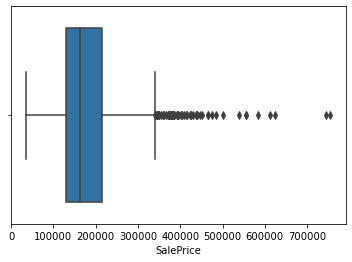

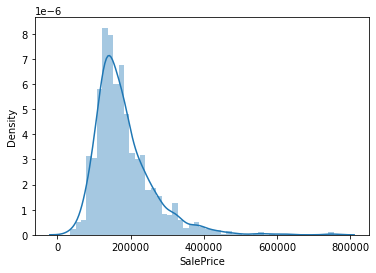

In [33]:
plt.xlabel('SalePrice')
sns.boxplot(df['SalePrice'])  
plt.show()
plt.xlabel('SalePrice')
sns.distplot(df['SalePrice'])
plt.show()

##### Our target variable contains outliers in the data and also it is right skewed. We will take log transformation on our target variable

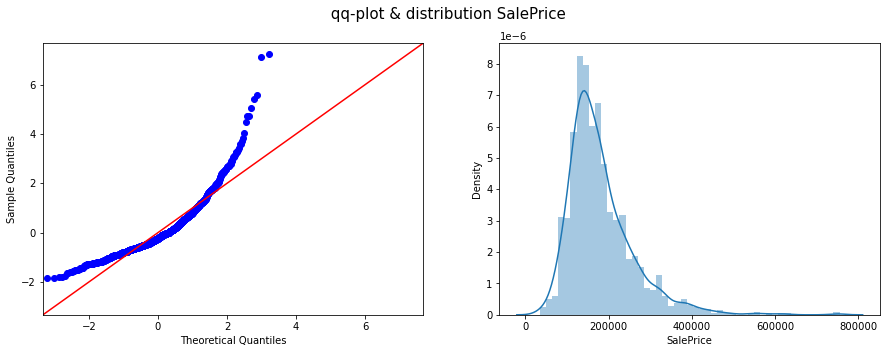

In [34]:
import statsmodels.api as sm
from scipy import stats

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(df['SalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(df['SalePrice'], kde = True, hist=True, ax = ax[1])
plt.show()

In [35]:
df['SalePrice_log'] = np.log(df['SalePrice'])

In [36]:
saleprice = df[['SalePrice']].copy()
df = df.drop('SalePrice',axis=1) # removing the orignal variable

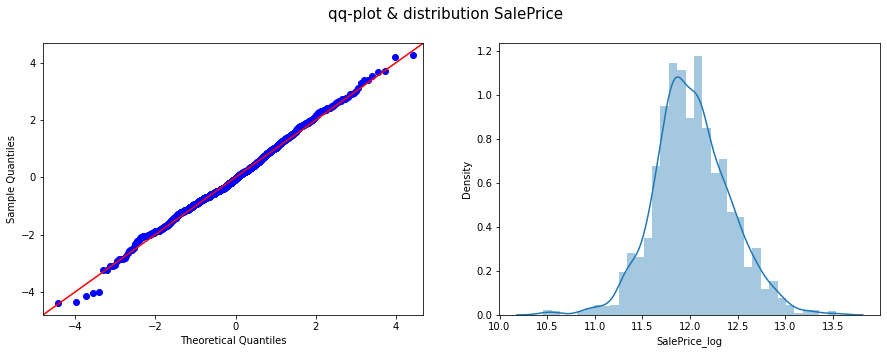

In [37]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(df['SalePrice_log'] , stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(df['SalePrice_log'] , kde = True, hist=True, ax = ax[1])
plt.show()

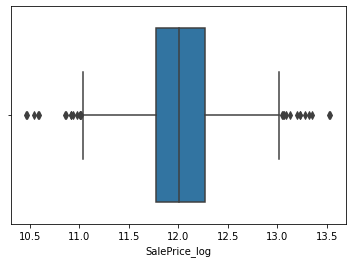

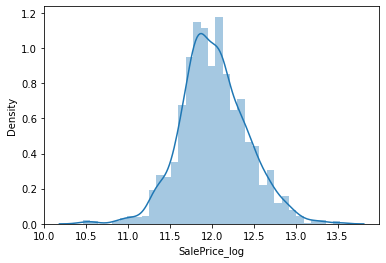

In [38]:
plt.xlabel('SalePrice_log')
sns.boxplot(df['SalePrice_log'])
plt.show()
plt.xlabel('SalePrice_log')
sns.distplot(df['SalePrice_log'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

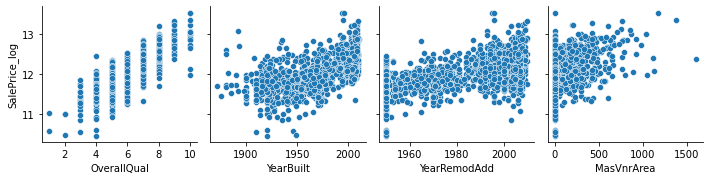

In [39]:
##Understanding pairplots against SalePricelog
sns.pairplot(x_vars=["OverallQual","YearBuilt","YearRemodAdd","MasVnrArea"],y_vars='SalePrice_log',data=df)
plt.show

<AxesSubplot:xlabel='LotFrontage'>

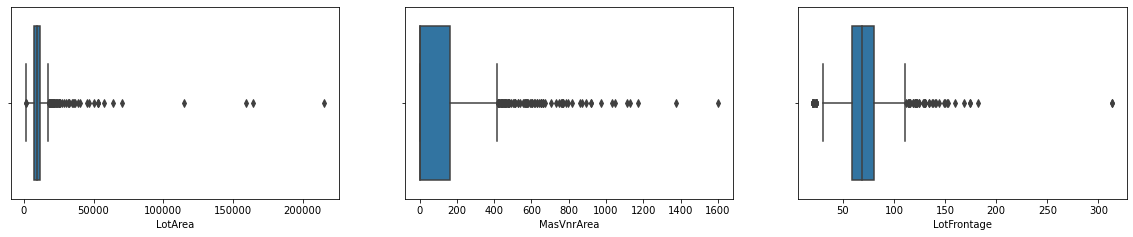

In [40]:
##Checking for outliers for some of the numerical variables using boxplots
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(df.LotArea)
plt.subplot(3,3,2)
sns.boxplot(df.MasVnrArea)
plt.subplot(3,3,3)
sns.boxplot(df.LotFrontage)

# Outliers Detection

In [41]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

In [42]:
num_data = df[num_col]
num_data.shape

(1460, 38)

In [43]:
num_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice_log  
0      12.247694  
1      12.109011  
2      12.317167  
3      11.849398  
4      12.429216  

[5 rows x 38 columns]

## Numerical columns

In [44]:
num_data.isnull().sum().sort_values(ascending=False)[:10]

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
dtype: int64

In [45]:
# Importing the SimpleImputer class 
from sklearn.impute import SimpleImputer

In [46]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='median')

In [47]:
num_data['LotFrontage'] = imputer.fit_transform(num_data[['LotFrontage']].copy()).ravel()
num_data['GarageYrBlt'] = imputer.fit_transform(num_data[['GarageYrBlt']].copy()).ravel()
num_data['MasVnrArea'] = imputer.fit_transform(num_data[['MasVnrArea']].copy()).ravel()

In [48]:
num_data.isnull().sum().sort_values(ascending=False)[:10]

Id              0
WoodDeckSF      0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
OpenPorchSF     0
dtype: int64

In [49]:
print("Shape of the data",num_data.shape)

Shape of the data (1460, 38)


<AxesSubplot:>

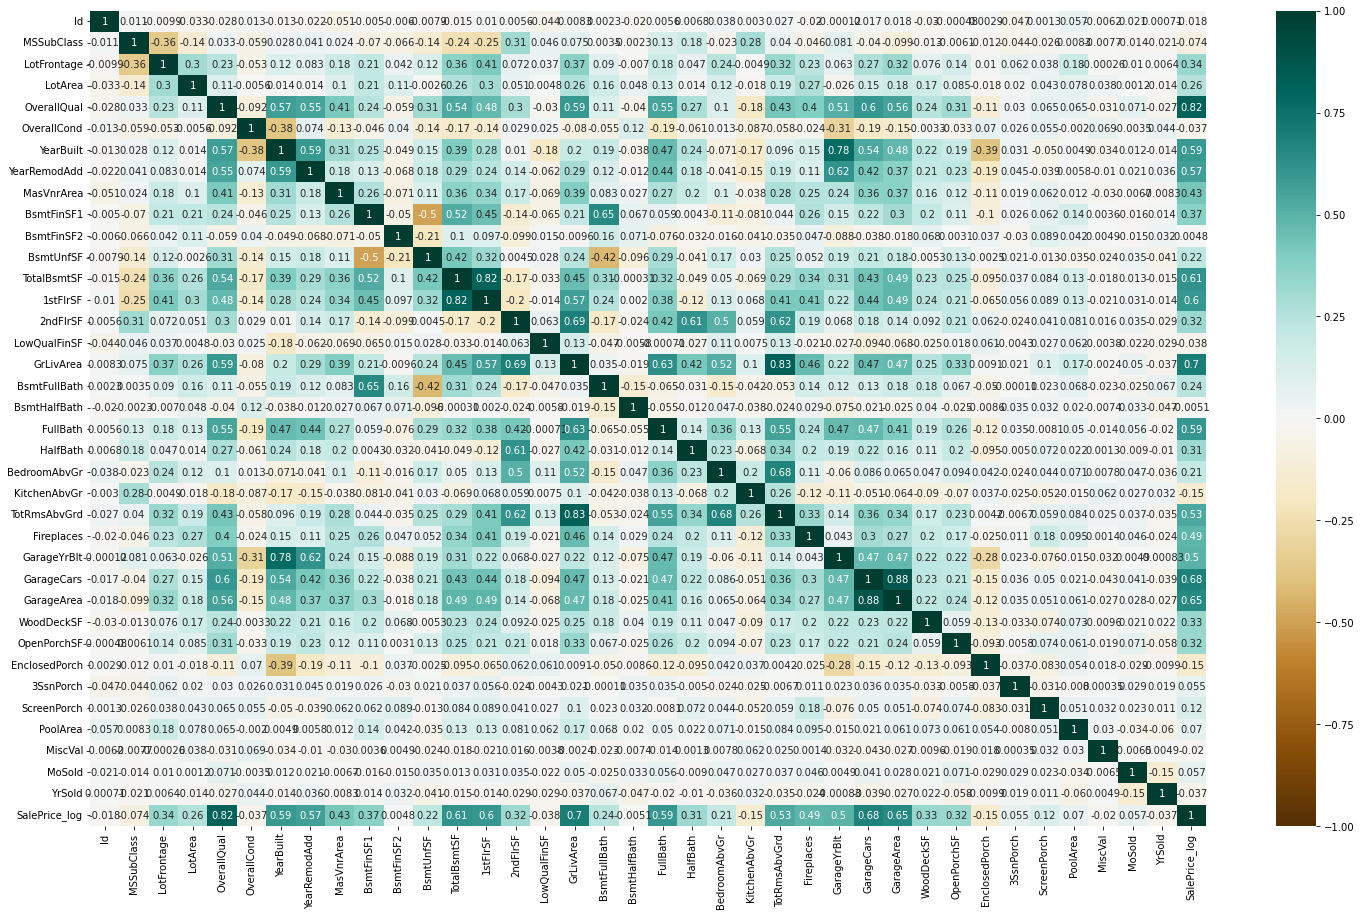

In [50]:
plt.figure(figsize=(25, 15))

sns.heatmap(num_data.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')

## Skewness in the numerical features

In [51]:
from scipy.stats import skew 
skew_in_vars = num_data.iloc[:,:-1].apply(lambda x: skew(x))
skew_in_vars.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.677636
d

In [52]:
high_skew = skew_in_vars[skew_in_vars > 0.5]
skew_index = high_skew.index
skew_index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [53]:
len(skew_index)

26

## Transforming the X- Feature (Log tranformation)

In [54]:
for i in skew_index:
    num_data[i] = np.log1p(num_data[i])

In [55]:
num_data.apply(lambda x: skew(x)).sort_values(ascending=False)

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
HalfBath          0.565586
MasVnrArea        0.503014
BsmtFullBath      0.418782
2ndFlrSF          0.289346
MSSubClass        0.248741
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
Fireplaces        0.181896
GarageArea        0.179796
WoodDeckSF        0.153379
SalePrice_log     0.121210
YrSold            0.096170
1stFlrSF          0.080032
FullBath          0.036524
Id                0.000000
GrLivArea        -0.006134
OpenPorchSF      -0.023373
TotRmsAbvGrd     -0.058198
LotArea          -0.137263
OverallCond      -0.253754
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
BsmtFinSF1       -0.617774
GarageYrBlt      -0.677636
LotFrontage      -0.869112
BsmtUnfSF        -2.184257
T

### Drop the columns that are not strongly correlated to the target variable numerical features that are less than a threshold corr value

In [56]:
num_corr_data = num_data.corr()
top_corr_num_col = num_corr_data.index[abs(num_corr_data['SalePrice_log'])>0.2]
top_corr_num_col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice_log'],
      dtype='object')

In [57]:
num_data_f = num_data[top_corr_num_col]
num_data_f.shape

(1460, 24)

<AxesSubplot:>

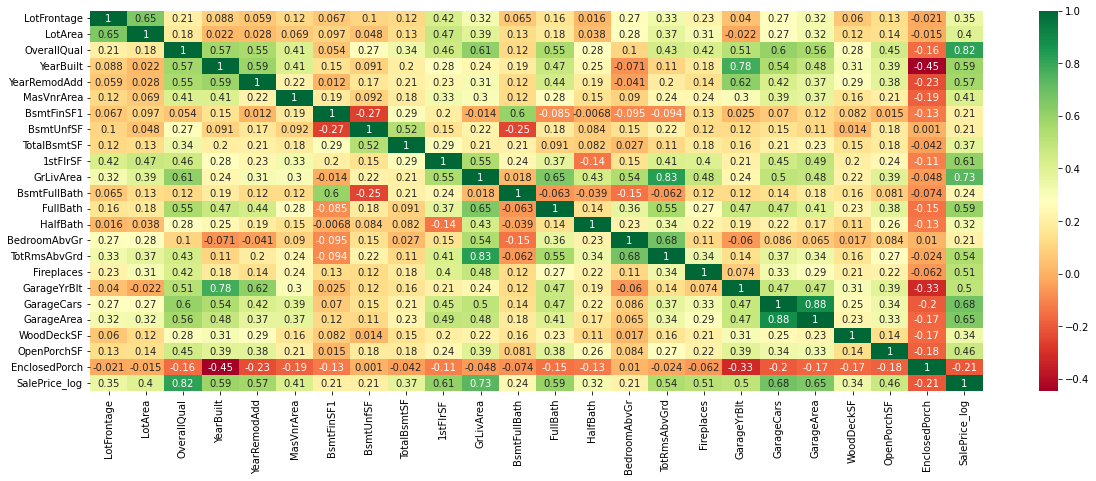

In [58]:
plt.figure(figsize=(20,7))
sns.heatmap(num_data_f.corr(),annot=True,cmap="RdYlGn")

# Categorical Variables

In [59]:
cat_col = df.select_dtypes(include=object).columns.tolist()
cat_col[:5]

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']

In [60]:
cat_df = df[cat_col]
cat_df.shape

(1460, 39)

In [61]:
cat_df.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ         NaN   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   
2      CollgCr       Norm       Norm  ...          Gd        Typ          TA   
3      Crawfor       Norm       Norm  ...          Gd        Typ          Gd   
4      NoRidge       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 39 columns]

In [62]:
cat_df.isnull().sum().sort_values(ascending=False)[:20]

FireplaceQu     690
GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
MasVnrType        8
Electrical        1
Heating           0
MSZoning          0
HeatingQC         0
CentralAir        0
Functional        0
PavedDrive        0
SaleType          0
KitchenQual       0
dtype: int64

In [63]:
cat_df['FireplaceQu'] = cat_df['FireplaceQu'].fillna('No Fireplace')
cat_df['GarageCond'] = cat_df['GarageCond'].fillna('No Garage')
cat_df['GarageQual'] = cat_df['GarageQual'].fillna('No Garage')
cat_df['GarageFinish'] = cat_df['GarageFinish'].fillna('No Garage')
cat_df['GarageType'] = cat_df['GarageType'].fillna('No Garage')

In [64]:
cat_df['BsmtFinType2'] = cat_df['BsmtFinType2'].fillna('No Basement')
cat_df['BsmtExposure'] = cat_df['BsmtExposure'].fillna('No Basement')
cat_df['BsmtCond']     = cat_df['BsmtCond'].fillna('No Basement')
cat_df['BsmtQual']     = cat_df['BsmtQual'].fillna('No Basement')
cat_df['BsmtFinType1'] = cat_df['BsmtFinType1'].fillna('No Basement')

In [65]:
cat_df['MasVnrType'] = cat_df['MasVnrType'].fillna('None')
cat_df['Electrical'] = cat_df['Electrical'].fillna(method='ffill')

In [66]:
cat_df.isnull().sum().sort_values(ascending=False).head()

MSZoning        0
KitchenQual     0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [67]:
cat_df.shape

(1460, 39)

In [68]:
print(cat_df.shape)
cat_df.head()

(1460, 39)


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...          Gd        Typ   
1      Veenker      Feedr       Norm  ...          TA        Typ   
2      CollgCr       Norm       Norm  ...          Gd        Typ   
3      Crawfor       Norm       Norm  ...          Gd        Typ   
4      NoRidge       Norm       Norm  ...          Gd        Typ   

    FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0  No Fireplace     Attchd          RFn         TA         TA          Y   
1            TA     Attchd          RFn         TA         TA          Y   
2            TA     Attchd          RFn         TA         TA          Y   
3            Gd     Detchd          Unf         TA         TA          Y   
4            TA     Attchd          RFn         TA         TA          Y   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal  

[5 rows x 39 columns]

In [69]:
# Adding Target variable
cat_df = pd.concat([cat_df,num_data_f[['SalePrice_log']]],axis=1)
cat_df.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Functional   FireplaceQu GarageType  \
0      CollgCr       Norm       Norm  ...        Typ  No Fireplace     Attchd   
1      Veenker      Feedr       Norm  ...        Typ            TA     Attchd   
2      CollgCr       Norm       Norm  ...        Typ            TA     Attchd   
3      Crawfor       Norm       Norm  ...        Typ            Gd     Detchd   
4      NoRidge       Norm       Norm  ...        Typ            TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  \
0          RFn         TA         TA          Y       WD        Normal   
1          RFn         TA         TA          Y       WD        Normal   
2          RFn         TA         TA          Y       WD        Normal   
3          Unf         TA         TA          Y       WD       Abnorml   
4          RFn         TA         TA          Y       WD        Normal   

  SalePrice_log  
0     12.247694  
1     12.109011  
2     12.317167  
3     11.849398  
4     12.429216  

[5 rows x 40 columns]

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice_log'>

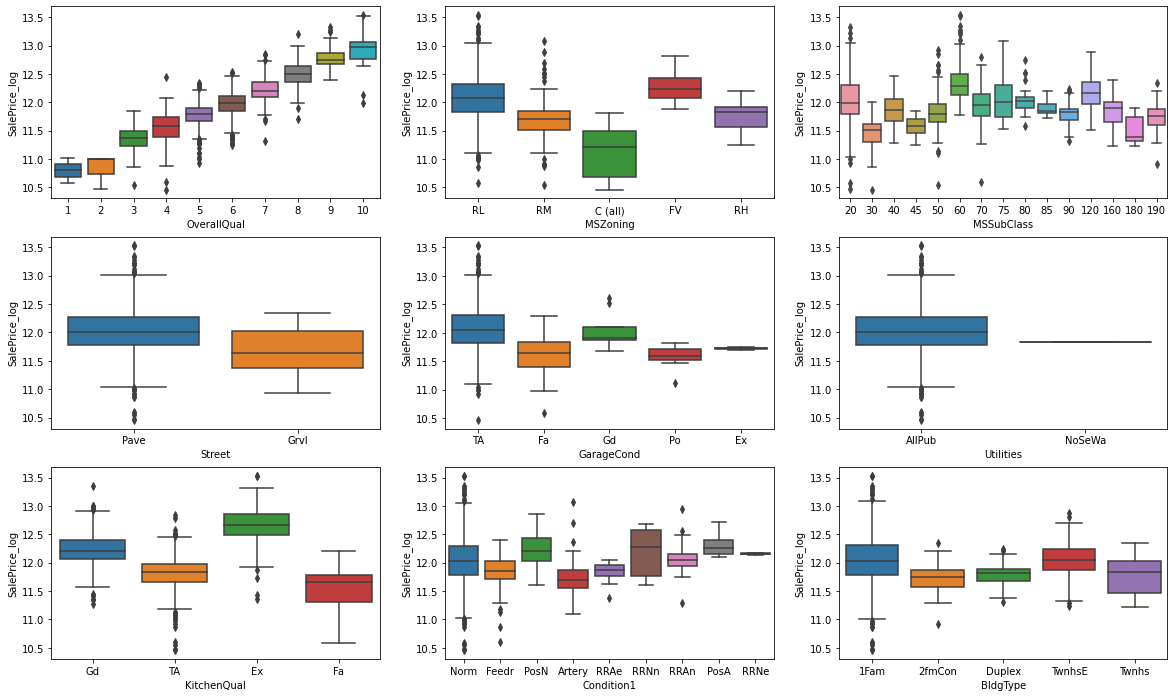

In [70]:
## Box plot for Key categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'OverallQual', y = 'SalePrice_log', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice_log', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice_log', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'Street', y = 'SalePrice_log', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'GarageCond', y = 'SalePrice_log', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'Utilities', y = 'SalePrice_log', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice_log', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'Condition1', y = 'SalePrice_log', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'BldgType', y = 'SalePrice_log', data = df)


List of categorical variables with correlation to Saleprice and with varying summary statistics

In [71]:
top_corr_cat_col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
                    'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [72]:
cat_df_f = cat_df[top_corr_cat_col]
cat_df_f.shape

(1460, 39)

### Creating Dummies

In [73]:
#convert categorical variable into dummy
cat_df_f = pd.get_dummies(cat_df_f)

In [74]:
cat_df_f.shape

(1460, 249)

In [75]:
cat_df_f.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0            0            1             0             0             0  ...   
1            0            1             0             0             0  ...   
2            0            1             1             0             0  ...   
3            0            1             1             0             0  ...   
4            0            1             1             0             0  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 249 columns]

# Final DataFrame

In [76]:
df_total =  pd.concat([df[['Id']],cat_df_f,num_data_f],axis=1)
df_total.shape

(1460, 274)

In [77]:
df_total.head()

Id  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0   1                 0            0            0            1            0   
1   2                 0            0            0            1            0   
2   3                 0            0            0            1            0   
3   4                 0            0            0            1            0   
4   5                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  ...  BedroomAbvGr  \
0            0            1             0             0  ...             3   
1            0            1             0             0  ...             3   
2            0            1             1             0  ...             3   
3            0            1             1             0  ...             3   
4            0            1             1             0  ...             4   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0      2.197225    0.000000       2003.0           2         548    0.000000   
1      1.945910    0.693147       1976.0           2         460    5.700444   
2      1.945910    0.693147       2001.0           2         608    0.000000   
3      2.079442    0.693147       1998.0           3         642    0.000000   
4      2.302585    0.693147       2000.0           3         836    5.262690   

   OpenPorchSF  EnclosedPorch  SalePrice_log  
0     4.127134       0.000000      12.247694  
1     0.000000       0.000000      12.109011  
2     3.761200       0.000000      12.317167  
3     3.583519       5.609472      11.849398  
4     4.442651       0.000000      12.429216  

[5 rows x 274 columns]

# Target and Independent variables

In [78]:
X = df_total.drop('SalePrice_log',axis =1)
y = df_total.pop('SalePrice_log')
print('X shape',X.shape)
print('y shape',y.shape)

X shape (1460, 273)
y shape (1460,)


In [79]:
X_Id = X[['Id']].copy()
X = X.drop('Id',axis = 1)
print('X shape',X.shape)

X shape (1460, 272)


# Train Test Split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.3, random_state =1)

In [82]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',train_labels.shape)
print('y test shape',test_labels.shape)

X train shape (1022, 272)
X test shape (438, 272)
y train shape (1022,)
y test shape (438,)


In [83]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',train_labels.shape)
print('y test shape',test_labels.shape)

X train shape (1022, 272)
X test shape (438, 272)
y train shape (1022,)
y test shape (438,)


# Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [85]:
lm = LinearRegression()

In [86]:
%%time
lm.fit(X_train,train_labels)

CPU times: user 167 ms, sys: 45.3 ms, total: 212 ms
Wall time: 66.5 ms


LinearRegression()

In [87]:
lr_model=lm.fit(X_train,train_labels)

## Prediction

In [88]:
y_pred_train_lr = lm.predict(X_train)
y_pred_test_lr =  lm.predict(X_test)

In [89]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(train_labels, y_pred_train_lr))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(test_labels, y_pred_test_lr))))

Root Mean Square Error train = 0.0884864206075321
Root Mean Square Error test = 7663313.612196855


In [90]:
test_labels_lr = pd.DataFrame(test_labels)
test_labels_lr.to_csv('test_labels_lr.csv')

In [91]:
y_pred_test_lr = pd.DataFrame(y_pred_test_lr)
y_pred_test_lr.to_csv('y_pred_test_lr.csv')

In [92]:
print("R-Square for training data",lm.score(X_train,train_labels)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for test data",lm.score(X_test,test_labels))

R-Square for training data 0.9465714384613376
R-Square for test data -310738839770653.06


In [93]:
X_test.loc[[375,1270,325,120,1011,1003],:].head(10)

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
375                  0            0            0            1            0   
1270                 0            0            0            1            0   
325                  0            0            0            0            1   
120                  0            0            0            1            0   
1011                 0            0            0            1            0   
1003                 0            0            0            1            0   

      Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
375             0            1             1             0             0  ...   
1270            0            1             0             0             0  ...   
325             0            1             0             0             0  ...   
120             0            1             1             0             0  ...   
1011            0            1             0             0             0  ...   
1003            0            1             1             0             0  ...   

      HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
375   0.693147             1      1.609438    0.000000       1980.0   
1270  0.693147             0      1.609438    0.693147       1979.0   
325   0.000000             2      1.791759    0.000000       1941.0   
120   0.000000             1      1.609438    1.098612       1969.0   
1011  0.000000             4      2.197225    0.000000       1980.0   
1003  0.000000             4      2.197225    0.000000       1976.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  
375            0           0    0.000000     0.000000       0.000000  
1270           2         586    5.594711     0.000000       0.000000  
325            2         360    0.000000     0.000000       5.501258  
120            2         540    0.000000     4.875197       0.000000  
1011           0           0    0.000000     0.000000       0.000000  
1003           2         528    0.000000     0.000000       0.000000  

[6 rows x 272 columns]

In [94]:
extreme=y_pred_test_lr[(y_pred_test_lr[0]<0)|(y_pred_test_lr[0]>15)].index

In [95]:
extreme

Int64Index([11, 18, 42, 249, 254, 335], dtype='int64')

In [96]:
X_test.head(20)

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
258                  0            0            0            1            0   
267                  0            0            0            1            0   
288                  0            0            0            1            0   
649                  0            0            0            0            1   
1233                 0            0            0            1            0   
167                  0            0            0            1            0   
926                  0            0            0            1            0   
831                  0            1            0            0            0   
1237                 0            0            0            1            0   
426                  0            0            0            1            0   
487                  0            0            0            1            0   
375                  0            0            0            1            0   
1126                 0            0            0            1            0   
53                   0            0            0            1            0   
1033                 0            0            0            1            0   
1022                 0            0            0            0            1   
1215                 0            0            0            1            0   
91                   0            0            0            1            0   
1270                 0            0            0            1            0   
680                  0            0            0            1            0   

      Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
258             0            1             0             0             0  ...   
267             0            1             0             0             0  ...   
288             0            1             1             0             0  ...   
649             0            1             0             0             0  ...   
1233            0            1             1             0             0  ...   
167             0            1             0             0             0  ...   
926             0            1             0             0             0  ...   
831             0            1             0             0             0  ...   
1237            0            1             0             1             0  ...   
426             0            1             0             0             0  ...   
487             0            1             1             0             0  ...   
375             0            1             1             0             0  ...   
1126            0            1             0             0             0  ...   
53              0            1             1             0             0  ...   
1033            0            1             0             0             0  ...   
1022            0            1             0             0             0  ...   
1215            0            1             1             0             0  ...   
91              0            1             0             0             0  ...   
1270            0            1             0             0             0  ...   
680             0            1             0             0             0  ...   

      HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
258   0.693147             3      2.079442    0.693147       2001.0   
267   0.693147             4      2.197225    0.693147       1939.0   
288   0.000000             3      1.791759    0.000000       1970.0   
649   0.000000             1      1.386294    0.000000       1980.0   
1233  0.000000             3      1.945910    0.000000       1959.0   
167   0.693147             3      2.197225    0.693147       2007.0   
926   0.693147             4      2.397895    0.693147       2003.0   
831   0.693147             2      1.609438    0.000000       2005.0   
1237  0.693147            

In [97]:
#dropping some of the observations due to erros in the prediction values 
X_test_update = X_test.drop([375,1270,325,120,1011,1003],axis=0)

In [98]:
y_pred_test_lr_update =  lm.predict(X_test_update)
y_pred_test_lr_update.shape

(432,)

In [99]:
test_labels_update = test_labels.drop([375,1270,325,120,1011,1003],axis=0)
test_labels_update.shape

(432,)

In [100]:
print('Training RMSE',round(np.sqrt(mean_squared_error(train_labels, y_pred_train_lr)),4))
print('Test RMSE',round(np.sqrt(mean_squared_error(test_labels_update, y_pred_test_lr_update)),4))

Training RMSE 0.0885
Test RMSE 0.1371


In [101]:
print("Training R2",round(lm.score(X_train,train_labels),4)) # Return the coefficient of determination R^2 of the prediction.
print("Test R2",round(lm.score(X_test_update,test_labels_update),4))

Training R2 0.9466
Test R2 0.8997


## Parameter Tuning with CV in LM

In [102]:
from sklearn.model_selection import KFold, RepeatedKFold,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,make_scorer , r2_score

In [103]:
n_folds = 5

scorer = make_scorer(mean_squared_error,greater_is_better = False)

def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(X.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,train_labels,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(X.values)
    rmse = np.sqrt(-cross_val_score(model,X_test_update,test_labels_update,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [104]:
lr_cv = LinearRegression()
lr_cv.fit(X_train,train_labels)

LinearRegression()

In [105]:
print(lr_cv.coef_)

[-1.79677166e+05 -1.79676806e+05 -1.79676781e+05 -1.79676852e+05
 -1.79676870e+05 -4.88573721e+09 -4.88573721e+09 -8.74531175e+08
 -8.74531175e+08 -8.74531175e+08 -8.74531175e+08  2.95659692e+08
  2.95659692e+08  2.95659692e+08  2.95659692e+08  3.18807536e+08
  3.18807535e+08  4.57904859e+07  4.57904859e+07  4.57904859e+07
  4.57904858e+07  4.57904859e+07 -5.89817530e+07 -5.89817529e+07
 -5.89817530e+07  4.97050722e+07  4.97050722e+07  4.97050721e+07
  4.97050722e+07  4.97050722e+07  4.97050721e+07  4.97050723e+07
  4.97050721e+07  4.97050721e+07  4.97050721e+07  4.97050720e+07
  4.97050721e+07  4.97050721e+07  4.97050722e+07  4.97050721e+07
  4.97050722e+07  4.97050722e+07  4.97050721e+07  4.97050721e+07
  4.97050721e+07  4.97050721e+07  4.97050721e+07  4.97050723e+07
  4.97050721e+07  4.97050722e+07  2.63321540e+07  2.63321541e+07
  2.63321541e+07  2.63321541e+07  2.63321541e+07  2.63321540e+07
  2.63321541e+07  2.63321541e+07  2.63321542e+07 -3.75670744e+06
 -3.75670732e+06 -3.75670

In [106]:
print(lr_cv.intercept_)

5715547011.660284


## Prediction

In [107]:
y_pred_train_lr_cv = lr_cv.predict(X_train)
y_pred_test_lr_cv =  lr_cv.predict(X_test_update)

In [108]:
print('rmse on train',round(rmse_CV_train(lr_cv).mean(),4))
print('rmse on test',round(rmse_CV_test(lr_cv).mean(),4))

rmse on train 18312954.1596
rmse on test 6873271.7077


# Ridge Regression

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

lm_ridge=Ridge()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

In [110]:
lm_ridge_grd = GridSearchCV(estimator = lm_ridge, param_grid=parameters)

In [111]:
lm_ridge_grd.fit(X_train,train_labels)

print("The best value of Alpha is: ",lm_ridge_grd.best_params_,lm_ridge_grd.best_score_)

The best value of Alpha is:  {'alpha': 1} 0.8735893911480483


In [112]:
lm_ridge_best_gcv = lm_ridge_grd.best_estimator_
lm_ridge_best_gcv

Ridge(alpha=1)

In [113]:
lm_ridge_best_gcv.fit(X_train,train_labels)

Ridge(alpha=1)

In [114]:
#print(lm_ridge_best_gcv.coef_)

In [115]:
print(lm_ridge_best_gcv.intercept_)

5.58345691126593


In [116]:
list_of_coeffs_ridge=list(zip(lm_ridge_best_gcv.coef_, X))

In [117]:
top_variables_ridge = sorted(list_of_coeffs_ridge, key = lambda x: abs(x[0]), reverse = True)

In [118]:
top_variables_ridge[0:10]

[(-0.5234209073275481, 'RoofMatl_ClyTile'),
 (0.350394742699644, 'GrLivArea'),
 (-0.3187677832963248, 'Condition2_PosN'),
 (0.22913050512519778, 'RoofMatl_WdShngl'),
 (-0.19659035699807684, 'MSZoning_C (all)'),
 (-0.19171570759217532, 'Functional_Maj2'),
 (-0.16033219854520428, 'Exterior1st_BrkComm'),
 (0.15897091101058425, 'Neighborhood_StoneBr'),
 (0.1318950445549551, 'GarageQual_Ex'),
 (0.12323377842017944, 'Neighborhood_Crawfor')]

## Prediction

In [119]:
y_pred_train_ridge_gcv = lm_ridge_best_gcv.predict(X_train)
y_pred_test_ridge_gcv =  lm_ridge_best_gcv.predict(X_test_update)

In [120]:
ridge_train_rmse=round(np.sqrt(mean_squared_error(train_labels, y_pred_train_ridge_gcv)),4)
ridge_test_rmse=round(np.sqrt(mean_squared_error(test_labels_update, y_pred_test_ridge_gcv)),4)
ridge_train_R2=round(lm_ridge_best_gcv.score(X_train,train_labels),4)
ridge_test_R2=round(lm_ridge_best_gcv.score(X_test_update,test_labels_update),4)

In [121]:
print('Root Mean Square Error train = ',ridge_train_rmse)
print('Root Mean Square Error test = ',ridge_test_rmse) 

Root Mean Square Error train =  0.0933
Root Mean Square Error test =  0.1369


In [122]:
print("R-Square for training data",ridge_train_R2)
print("R-Square for test data",ridge_test_R2)

R-Square for training data 0.9407
R-Square for test data 0.8999


# LASSO 

In [123]:
from sklearn.linear_model import Lasso

In [124]:
lm_lasso =Lasso()
parameters= {'alpha':[x for x in [0.000001,0.00001,0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

In [125]:
lm_lasso_grd = GridSearchCV(estimator=lm_lasso, 
                            param_grid=parameters)

In [126]:
lm_lasso_grd.fit(X_train,train_labels)

print("The best value of Alpha is: ",lm_lasso_grd.best_params_,lm_lasso_grd.best_score_)

The best value of Alpha is:  {'alpha': 0.0005} 0.8828849966481982


In [127]:
lm_lasso_best_gcv = lm_lasso_grd.best_estimator_
lm_lasso_best_gcv

Lasso(alpha=0.0005)

In [128]:
lm_lasso_best_gcv.fit(X_train,train_labels)

Lasso(alpha=0.0005)

In [129]:
#print(lm_lasso_best_gcv.coef_)

In [130]:
print(lm_lasso_best_gcv.intercept_)

3.6678944601492116


In [131]:
list_of_coeffs_lasso=list(zip(lm_lasso_best_gcv.coef_, X))

In [132]:
top_variables_lasso = sorted(list_of_coeffs_lasso, key = lambda x: abs(x[0]), reverse = True)

In [133]:
top_variables_lasso[0:10]

[(-0.8054366237023892, 'RoofMatl_ClyTile'),
 (0.36811313925163486, 'GrLivArea'),
 (-0.30025719485372077, 'Condition2_PosN'),
 (0.1456448806889158, 'Neighborhood_Crawfor'),
 (-0.1414033832021666, 'Functional_Maj2'),
 (0.1356272454472062, 'Neighborhood_StoneBr'),
 (0.09295181961562039, 'Functional_Typ'),
 (0.07785376309190048, 'Neighborhood_NridgHt'),
 (0.07658283952448017, 'RoofMatl_WdShngl'),
 (-0.075875487431892, 'MSZoning_C (all)')]

## Prediction

In [134]:
y_pred_train_lasso_gcv = lm_lasso_best_gcv.predict(X_train)
y_pred_test_lasso_gcv =  lm_lasso_best_gcv.predict(X_test_update)

In [135]:
lasso_train_rmse=round(np.sqrt(mean_squared_error(train_labels, y_pred_train_lasso_gcv)),4)
lasso_test_rmse=round(np.sqrt(mean_squared_error(test_labels_update, y_pred_test_lasso_gcv)),4)
lasso_train_R2=round(lm_lasso_best_gcv.score(X_train,train_labels),4)
lasso_test_R2=round(lm_lasso_best_gcv.score(X_test_update,test_labels_update),4)

In [136]:
print('Training RMSE',lasso_train_rmse)
print('Test RMSE',lasso_test_rmse) 

Training RMSE 0.1022
Test RMSE 0.1364


In [137]:
print("Training R2",lasso_train_R2)
print("Test R2",lasso_test_R2)

Training R2 0.9287
Test R2 0.9007


#### Comparing Ridge & Lasso models

In [138]:
print("               Ridge  | Lasso")
print("              -----------------")
print("Training RMSE|",ridge_train_rmse,"| ",lasso_train_rmse)
print("Test RMSE    |",ridge_test_rmse,"| ",lasso_test_rmse)
print("Training R2  |",ridge_train_R2,"| ",lasso_train_R2)
print("Test R2      |",ridge_test_R2,"| ",lasso_test_R2)

               Ridge  | Lasso
              -----------------
Training RMSE| 0.0933 |  0.1022
Test RMSE    | 0.1369 |  0.1364
Training R2  | 0.9407 |  0.9287
Test R2      | 0.8999 |  0.9007


### Based on the test and training RMSE & R2, Lasso model seems to perform slightly better than Ridge model

## Question 1 

### Ridge - Doubling the hyper parameter 1 to 2

In [139]:
rr = Ridge(alpha=2)

rr.fit(X_train, train_labels) 

pred_train_rr= rr.predict(X_train)
pred_test_rr= rr.predict(X_test_update)

rr_train_rmse=round(np.sqrt(mean_squared_error(train_labels,pred_train_rr)),4)
rr_test_rmse=round(np.sqrt(mean_squared_error(test_labels_update,pred_test_rr)),4)
rr_train_R2=round(r2_score(train_labels, pred_train_rr),4)
rr_test_R2=round(r2_score(test_labels_update, pred_test_rr),4)

print("Training RMSE : ",rr_train_rmse)
print("Test RMSE : ",rr_test_rmse)

print("Training R2 : ",rr_train_R2)
print("Test R2 : ",rr_test_R2)

Training RMSE :  0.0964
Test RMSE :  0.1382
Training R2 :  0.9366
Test R2 :  0.898


### Comparing Ridge for alpha =1 vs alpha = 2

In [140]:
print("              Ridge alpha =1 | Ridge alpha =2")
print("             --------------------------------")
print("Training RMSE|  ",ridge_train_rmse,"     | ",rr_train_rmse)
print("Test RMSE    |  ",ridge_test_rmse,"     | ",rr_test_rmse)
print("Training R2  |  ",ridge_train_R2,"     | ",rr_train_R2)
print("Test R2      |  ",ridge_test_R2,"     | ",rr_test_R2)

              Ridge alpha =1 | Ridge alpha =2
             --------------------------------
Training RMSE|   0.0933      |  0.0964
Test RMSE    |   0.1369      |  0.1382
Training R2  |   0.9407      |  0.9366
Test R2      |   0.8999      |  0.898


#### There is only a slight change in  R2 and RMSE suggesting not much change in the model's fit

#### Top 10 variables in Ridge after changing alpha

In [141]:
list_of_coeffs_ridge_new=list(zip(rr.coef_, X))

In [142]:
top_variables_ridge_2 = sorted(list_of_coeffs_ridge_new, key = lambda x: abs(x[0]), reverse = True)

In [143]:
top_variables_ridge_2[0:10]

[(-0.33292721738288983, 'RoofMatl_ClyTile'),
 (0.30573438278550785, 'GrLivArea'),
 (-0.22417459257966982, 'Condition2_PosN'),
 (0.1724306389752507, 'RoofMatl_WdShngl'),
 (-0.1639850932593931, 'Functional_Maj2'),
 (-0.15168161462368565, 'MSZoning_C (all)'),
 (0.14523428663801435, 'Neighborhood_StoneBr'),
 (0.12181617539955943, 'Neighborhood_Crawfor'),
 (0.10978519033792927, 'Functional_Typ'),
 (-0.10417046379956885, 'Exterior1st_BrkComm')]

### Lasso - Doubling the hyper parameter 0.0005 to 0.001

In [144]:
ll = Lasso(alpha=0.001)

ll.fit(X_train, train_labels) 

pred_train_ll= ll.predict(X_train)
pred_test_ll= ll.predict(X_test_update)

ll_train_rmse=round(np.sqrt(mean_squared_error(train_labels,pred_train_ll)),4)
ll_test_rmse=round(np.sqrt(mean_squared_error(test_labels_update,pred_test_ll)),4)
ll_train_R2=round(r2_score(train_labels, pred_train_ll),4)
ll_test_R2=round(r2_score(test_labels_update, pred_test_ll),4)

print("Training RMSE : ",ll_train_rmse)
print("Test RMSE : ",ll_test_rmse)

print("Training R2 : ",ll_train_R2)
print("Test R2 : ",ll_test_R2)

Training RMSE :  0.1148
Test RMSE :  0.144
Training R2 :  0.9101
Test R2 :  0.8893


### Comparing Lasso for alpha =0.0005 vs alpha = 0.001

In [145]:
print("              Lasso alpha =0.0005 | Lasso alpha =0.001")
print("             -----------------------------------------")
print("Training RMSE|  ",lasso_train_rmse,"          | ",ll_train_rmse)
print("Test RMSE    |  ",lasso_test_rmse,"          | ",ll_test_rmse)
print("Training R2  |  ",lasso_train_R2,"          | ",ll_train_R2)
print("Test R2      |  ",lasso_test_R2,"          | ",ll_test_R2)

              Lasso alpha =0.0005 | Lasso alpha =0.001
             -----------------------------------------
Training RMSE|   0.1022           |  0.1148
Test RMSE    |   0.1364           |  0.144
Training R2  |   0.9287           |  0.9101
Test R2      |   0.9007           |  0.8893


#### There is a drop in R2 and increase in RMSE suggesting slightly weaker model for alpha = 0.001 compared to alpha = 0.0005

#### Top 10 variables in Lasso after changing alpha

In [146]:
list_of_coeffs_lasso_new=list(zip(ll.coef_, X))

In [147]:
top_variables_lasso_2 = sorted(list_of_coeffs_lasso_new, key = lambda x: abs(x[0]), reverse = True)

In [148]:
top_variables_lasso_2[0:10]

[(0.3250733444016841, 'GrLivArea'),
 (-0.1728072062664914, 'RoofMatl_ClyTile'),
 (0.13104657745513348, 'Neighborhood_Crawfor'),
 (0.10149393121073125, 'Neighborhood_StoneBr'),
 (0.08083988957297568, 'Functional_Typ'),
 (0.07677501660801443, 'Neighborhood_NridgHt'),
 (0.07079894222021532, 'Exterior1st_BrkFace'),
 (0.06435595716366636, 'LotArea'),
 (0.06359760617926363, 'OverallQual'),
 (0.059712007202999, 'GarageCars')]

### Question 3

### What if the Top 5 predictors in Lasso are unavailable?

In [149]:
## Top 5 predictors in the original Lasso model
top_variables_lasso[0:5]

[(-0.8054366237023892, 'RoofMatl_ClyTile'),
 (0.36811313925163486, 'GrLivArea'),
 (-0.30025719485372077, 'Condition2_PosN'),
 (0.1456448806889158, 'Neighborhood_Crawfor'),
 (-0.1414033832021666, 'Functional_Maj2')]

In [150]:
### drop these from train and test data set and model again

In [151]:
X_train_drop=X_train.drop(['RoofMatl_ClyTile','GrLivArea','Condition2_PosN','Neighborhood_Crawfor','Functional_Maj2'],axis=1)

In [152]:
X_test_update_drop=X_test_update.drop(['RoofMatl_ClyTile','GrLivArea','Condition2_PosN','Neighborhood_Crawfor','Functional_Maj2'],axis=1)

In [153]:
lm_lasso_drop =Lasso()
parameters= {'alpha':[x for x in [0.000001,0.00001,0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

In [154]:
lm_lasso_grd_drop = GridSearchCV(estimator=lm_lasso_drop, 
                            param_grid=parameters)

In [155]:
lm_lasso_grd_drop.fit(X_train_drop,train_labels)

print("The best value of Alpha is: ",lm_lasso_grd_drop.best_params_,lm_lasso_grd_drop.best_score_)

The best value of Alpha is:  {'alpha': 0.0005} 0.8657340257746602


In [156]:
lm_lasso_best_gcv_drop = lm_lasso_grd_drop.best_estimator_
lm_lasso_best_gcv_drop

Lasso(alpha=0.0005)

In [157]:
lm_lasso_best_gcv_drop.fit(X_train_drop,train_labels)

Lasso(alpha=0.0005)

In [158]:
list_of_coeffs_lasso_drop=list(zip(lm_lasso_best_gcv_drop.coef_, X))

In [159]:
top_variables_lasso_drop = sorted(list_of_coeffs_lasso_drop, key = lambda x: abs(x[0]), reverse = True)

In [160]:
top_variables_lasso_drop[0:5]

[(0.20074901165153136, 'MasVnrArea'),
 (0.11166596549426795, 'Neighborhood_Somerst'),
 (-0.10410032451691362, 'MSZoning_C (all)'),
 (0.1026682881633842, 'RoofMatl_Roll'),
 (0.09851779783672465, 'GrLivArea')]

#### Prediction

In [161]:
y_pred_train_lasso_gcv_drop = lm_lasso_best_gcv_drop.predict(X_train_drop)
y_pred_test_lasso_gcv_drop =  lm_lasso_best_gcv_drop.predict(X_test_update_drop)
lasso_train_rmse_drop=round(np.sqrt(mean_squared_error(train_labels, y_pred_train_lasso_gcv_drop)),4)
lasso_test_rmse_drop=round(np.sqrt(mean_squared_error(test_labels_update, y_pred_test_lasso_gcv_drop)),4)
lasso_train_R2_drop=round(lm_lasso_best_gcv_drop.score(X_train_drop,train_labels),4)
lasso_test_R2_drop=round(lm_lasso_best_gcv_drop.score(X_test_update_drop,test_labels_update),4)

#### New model parameters after dropping Top 5 predictors

In [162]:
print('Training RMSE = ',lasso_train_rmse_drop)
print('Test RMSE = ',lasso_test_rmse_drop) 
print("Training R2",lasso_train_R2_drop)
print("Test R2",lasso_test_R2_drop)

Training RMSE =  0.1154
Test RMSE =  0.1428
Training R2 0.9091
Test R2 0.8911


### Comparison with old model parameters

In [163]:
print("              Lasso Old | Lasso New (After dropping Top 5 variables)")
print("             -----------------------")
print("Training RMSE|  ",lasso_train_rmse,"| ",lasso_train_rmse_drop)
print("Test RMSE    |  ",lasso_test_rmse,"| ",lasso_test_rmse_drop)
print("Training R2  |  ",lasso_train_R2,"| ",lasso_train_R2_drop)
print("Test R2      |  ",lasso_test_R2,"| ",lasso_test_R2_drop)

              Lasso Old | Lasso New (After dropping Top 5 variables)
             -----------------------
Training RMSE|   0.1022 |  0.1154
Test RMSE    |   0.1364 |  0.1428
Training R2  |   0.9287 |  0.9091
Test R2      |   0.9007 |  0.8911


#### We see that the RMSE increases from 0.1364 to 0.1428 for test data and R2 values drop a little from .9091 to .8911 for test data. The model becomes slightly weaker after dropping the Top 5 predictors

#### Old Top 5 predictor variables
<br>1) RoofMatl_ClyTile <br> 2) GrLivArea <br>3) Condition2_PosN <br>4) Neighborhood_Crawfor <br>5) Functional_Maj2  <br>

#### The new Top 5 variables 
<br>1) MasVnrArea <br>2) Neighborhood_Somerst <br>3) MSZoning_C (all) <br>4) RoofMatl_Roll <br>5) GrLivArea"